# Computational Finance I
**Lab-Exercise No. 4**


## Write your data

In [46]:
print("First Name: "+ "Zhirui")
print("Sure Name: " + "Tang")
print("Matriculation number: " + "1942800")
print("E-mail: " + "zhirui.tang@uni-wuppertal.de")
print("Degree Type: " + "Master") # Bachelor or Master
print("Degree Name: " + "Master of Science in Computer Simulation in Science") # E.g. Master of Science in Computer Simulation in Science

First Name: Zhirui
Sure Name: Tang
Matriculation number: 1942800
E-mail: zhirui.tang@uni-wuppertal.de
Degree Type: Master
Degree Name: Master of Science in Computer Simulation in Science


# For the programming task write the corresponding Python codes that are asked in each section below.

# P 4:  SDE simulation in option pricing
The Euler-Maruyama method and the Milstein method can be used to approximate a stochastic differential equation.
Consider the geometric Brownian motion
$$ {\rm d}S_t = \mu S_t \; {\rm d}t + \sigma S_t \; {\rm d}W_t. $$

## Import all necessary modules

In [47]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import integrate

# Start coding
**Note:** 
* Add code where you find the comment "# Add code here"
* Get the same output as it is presented in the Markdown text **Expected Output:**

## Define a function to implement Euler-Maruyama method to approximate the SDE

In [48]:
def euler_maruyama(mu, sigma, S0, h, N, dW):
    """"
    Function to implements Euler-Maruyama method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
    """
    # Add code here
    S = S0 + mu*S0*h + sigma*S0*dW
    
    return S

## Define a function to implement Milstein method to approximate the SDE

In [61]:
def milstein(mu, sigma, S0, h, N, dW):
    """"
    Function to implements Milstein method to simulate SDEs
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step, dW E R^M
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion, S E R^(M+1)
    """
    # Add code here
    
    S = S0 + mu*S0*h + sigma*S0*dW + 0.5*sigma**2*S0*(dW**2-h)

    return S

Implement above methods with $\mu=0.06$ and $\sigma=0.3$ and initial value $S_0=50$ for $t \in [0,1]$ and plot some paths (e.g. 50) using $h=10^{-2}$. 

## Input parameters

In [50]:
# Input parameters
mu = 0.06
sigma = 0.3
S0 = 50
t0 = 0
T = 1

## Plot $50$ paths using each method

0.10380538841120308


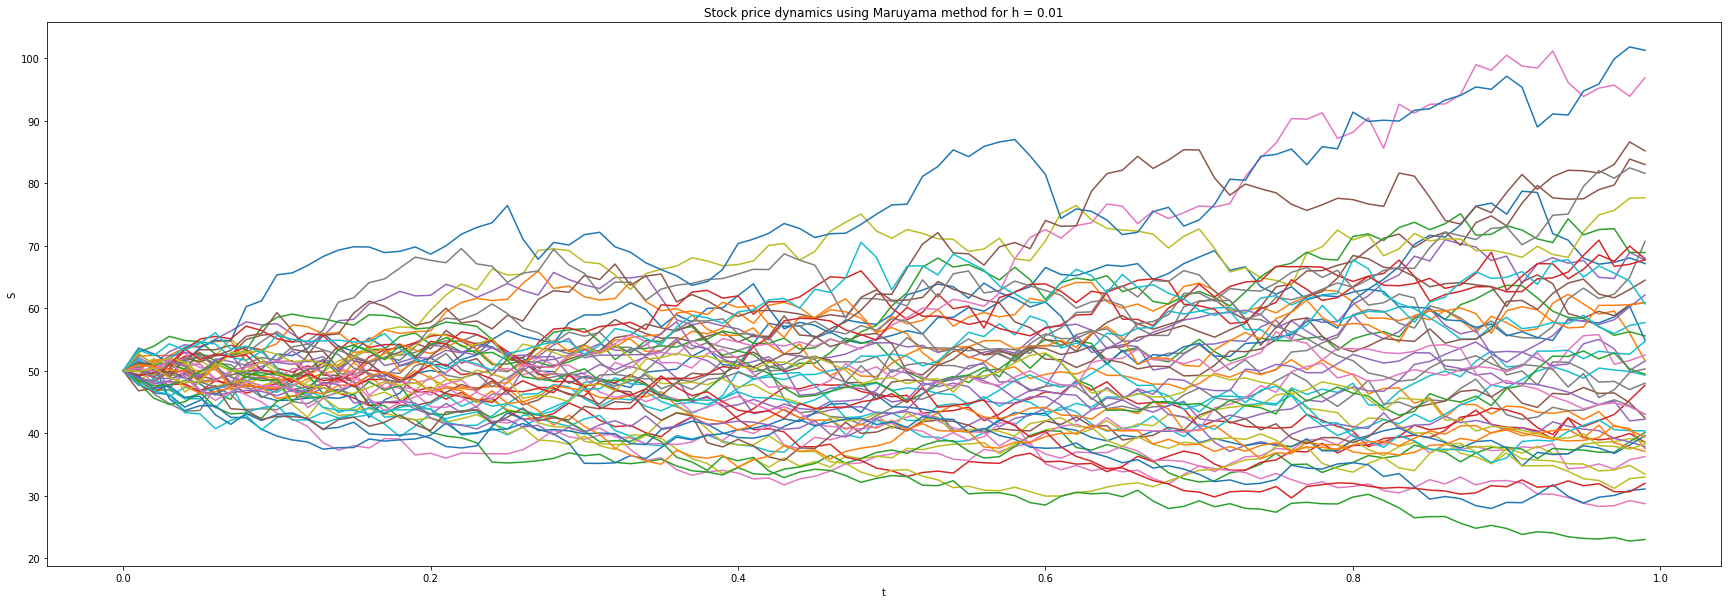

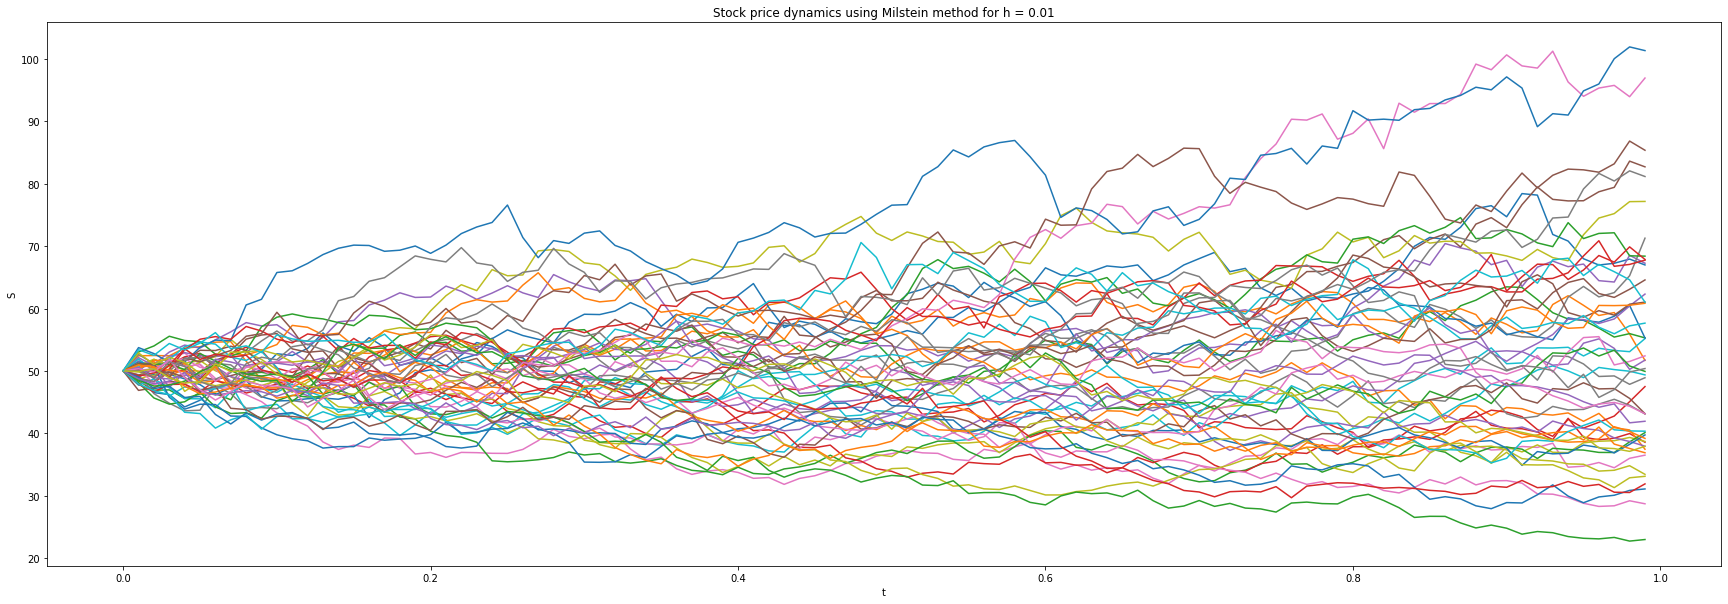

In [89]:
M = 50
h = 10**(-2)
# Add code here
N = int((T-t0)/h)
_, axes1 = plt.subplots(1, 1, figsize=(30, 10))
_, axes2 = plt.subplots(1, 1, figsize=(30, 10))
axes1.set_title("Stock price dynamics using Maruyama method for h = 0.01")
axes1.set_xlabel('t')
axes1.set_ylabel('S')
axes2.set_title("Stock price dynamics using Milstein method for h = 0.01")
axes2.set_xlabel('t')
axes2.set_ylabel('S')
t = np.arange(t0, T, h)
y1 = np.zeros(N)
y2 = np.zeros(N)
y1[0] = S0
y2[0] = S0
dt = h
err= 0
for _ in range(M):
    for i in range(1, N):
        dW = np.random.normal(loc=0.0, scale=np.sqrt(dt))
        y1[i] = euler_maruyama(mu, sigma, y1[i-1], h, N, dW)
        y2[i] = milstein(mu, sigma, y2[i-1], h, N, dW)
    axes1.plot(t, y1)
    axes2.plot(t, y2)
    err += abs(y2[N-1]-y1[N-1])
print(err/100)

Compare the approximations $\hat{S}_T$ using the both methods to the exact solution $S_T$ by computing the error $\widehat{\epsilon}$  defined by
$$
\widehat{\epsilon}(h):=\frac{1}{M}\sum_{k=1}^{M}\left|S_{T,k} - \hat{S}_{T,k} \right|
$$
for $M=100$ different paths. Use the step sizes $h=10^{-i}$ for $i=1,2,3,4$ and thus 
try to estimate the rate of strong convergence in each method (`hint`: take the `log` and then apply linear regression to estimate the strong order of convergence).

## Define a function to implement Geomteric Brownian Motion solution 

In [92]:
def GBM(mu, sigma, S0, h, N, dW):
    """"
    Function to implements GBM solution
    
    Input: 
        mu    -> mean returns
        sigma -> volatility
        S0    -> Stock price today
        h     -> time discretization step size
        N     -> Number of time points
        dW    -> Increment of brownian motion at each time step
    Output:
        S     -> Stock price dynamics for the given realisation of Brownian Motion
    """
    # Add code here
    GBM.W += dW
    S = S0*exp((mu - 0.5*sigma**2)*h+ sigma*GBM.W ) #each time S0 = S_{i-1}
    return S

## Check the errors and estimate strong convergence order

h            err_EM           err_M           
------------------------------------
0.1000       0.7669           0.0725          
0.0100       0.2745           0.0077          
0.0010       0.0854           0.0009          
0.0001       0.0244           0.0001          
Strong convergence order of Euler Maruyama is c = 0.5000
Strong convergence order of Milstein is c = 0.9579


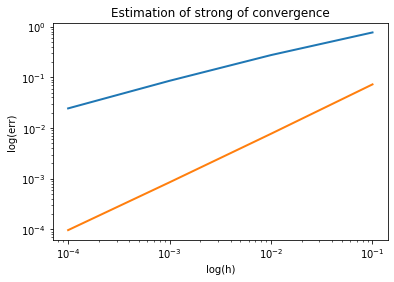

In [130]:
h = [10**(-1), 10**(-2), 10**(-3), 10**(-4)]
M = 100
# Add code here
# do not forget initialization
err1 = np.zeros(len(h)) #err_EM
err2 = np.zeros(len(h)) #err_M
for i in range(len(h)):
    N = int((T-t0)/h[i])
    er1 = 0
    er2 = 0
    for j in range(M):
        # Create Brownian Motion
        np.random.seed(j)
        y1 = np.zeros(N)
        y2 = np.zeros(N)
        y3 = np.zeros(N)
        y1 = S0
        y2 = S0
        y3[0] = S0
        GBM.W = 0
        for k in range(1, N):
            dW = np.random.normal(loc=0.0, scale=np.sqrt(h[i]))
            y1 = euler_maruyama(mu, sigma, y1, h[i], N, dW)
            y2 = milstein(mu, sigma, y2, h[i], N, dW)
            y3 = GBM(mu, sigma, S0, h[i]*k, N, dW) #pay attention the t and dW
        er1 += abs(y1 - y3)
        er2 += abs(y2 - y3)
   #     print(S1[j], S2[j], S3[j]) 
    err1[i] = er1/100
    err2[i] = er2/100
    
print('%-12s' %"h", '%-16s' %"err_EM", '%-16s' %"err_M")
print('------------------------------------')
for i in range(len(h)):
    print('%-12.4f' %h[i], '%-16.4f' %err1[i], '%-16.4f' %err2[i])

plt.plot(h, err1, label='EulerMaruyama',lw=2)
plt.plot(h, err2, label='Milstein', lw=2)
plt.title('Estimation of strong of convergence')
plt.xlabel("log(h)")
plt.ylabel("log(err)")
plt.yscale('log')
plt.xscale('log')

plt.show

reg = LinearRegression().fit(np.log(h).reshape(-1,1), np.log(err1).reshape(-1,1))
c1 = reg.coef_
reg = LinearRegression().fit(np.log(h).reshape(-1,1), np.log(err2).reshape(-1,1))
c2 = reg.coef_

print("Strong convergence order of Euler Maruyama is c = %.4f" %c1)
print("Strong convergence order of Milstein is c = %.4f" %c2)



In addition to the given parameter values of the geometric Brownian motion above, we set $K=50$ (strike) and $r=0.05$ (interest rate).
Apply the Euler-Maruyama and the Milstein method to approximate the European Call-option with the payoff
$$
(S_T- K)^+,
$$
and compare your results to the Black-Schloes solution for different $M$. What can you observe?

`BONUS:`Instead of the European Call-option we consider an Asian-option which has the payoff  
$$
\left(\frac{1}{T}\int_0^T  S_T- K\right)^+.
$$
Price the Asian-option for the same parameter values using the both methods.

`Hint:` Approximate the integral using numerical itegration methods, e.g. Simpson Rule.


## Define a function to implement Black Scholes formula

In [135]:
def BlackScholes(S0, K, r, T, sigma):
    """"
    Function to implements Black Scholes formula for European Call option
    
    Input: 
        S0    -> Stock price today
        K     -> Strike price
        r     -> Interest rate
        T     -> Maturity
        sigma -> volatility
    Output:
        C     -> Fair value of European Call price
    """
    # Add code here
    d_1 = (log(S0/K) + (r+0.5*sigma**2)*T) / (sigma*sqrt(T))
    d_2 = (log(S0/K) + (r-0.5*sigma**2)*T) / (sigma*sqrt(T))
    C = S0 * norm.cdf(d_1) - K*exp(-r*T)*norm.cdf(d_2)
    
    return C

## Compare the results using paths $M = [10, 100, 1000]$ with step size $h=10^{-4}$

In [144]:
K = 50
r = 0.05
M = [10, 100, 1000]
# Add code here
h = 10**(-4)
N = int((T-t0)/h)
C_EM = np.zeros(len(M))
C_M = np.zeros(len(M))
err_EM = np.zeros(len(M))
err_M = np.zeros(len(M))
A_C_EM = np.zeros(len(M))
A_C_M = np.zeros(len(M))
C_BS = BlackScholes(S0, K, r, T, sigma)
for i in range(len(M)):
    y1 = np.zeros(M[i])
    y2 = np.zeros(M[i])
    A1 = np.zeros(M[i])
    A2 = np.zeros(M[i])
    s1 = np.zeros(N)
    s2 = np.zeros(N)
    for j in range(M[i]):
        s1[0] = S0
        s2[0] = S0
        for k in range(1, N):
            dW = np.random.normal(loc=0.0, scale=np.sqrt(h))
            s1[k] = euler_maruyama(mu, sigma, s1[k-1], h, N, dW)
            s2[k] = milstein(mu, sigma, s2[k-1], h, N, dW)
        y1[j] = max(s1[N-1]-K, 0)
        y2[j] = max(s2[N-1]-K, 0)
        t = np.arange(0, 1, h)
        A1[j] = max(integrate.simps(s1-K, t), 0)
        A2[j] = max(integrate.simps(s2-K, t), 0)
    sita_1 = 1/M[i]*np.sum(y1)
    sita_2 = 1/M[i]*np.sum(y2)
    sita_3 = 1/M[i]*np.sum(A1)
    sita_4 = 1/M[i]*np.sum(A2)
    C_EM[i] = exp(-r*T)*sita_1
    C_M[i] = exp(-r*T)*sita_2
    A_C_EM[i] = exp(-r*T)*sita_3
    A_C_M[i] = exp(-r*T)*sita_4
    err_EM[i] = C_BS - C_EM[i]
    err_M[i] = C_BS - C_M[i]
print('%-12s' %"M", '%-16s' %"C_BS", '%-16s' %"C_EM", '%-16s' %"err_EM", '%-16s' %"C_EM", '%-16s' %"err_M", 
     '%-16s' %"A_C_EM", '%-16s' %"A_C_M")
print('---------------------------------------------------------------------------------------------------------')
for i in range(len(M)):
    print('%-12i' %M[i], '%-16.4f' %C_BS, '%-16.4f' %C_EM[i], '%-16.4f' %err_EM[i], '%-16.4f' %C_M[i],
         '%-16.4f' %err_M[i], '%-16.4f' %A_C_EM[i], '%-16.4f' %A_C_M[i])

M            C_BS             C_EM             err_EM           C_EM             err_M            A_C_EM           A_C_M           
---------------------------------------------------------------------------------------------------------
10           7.1156           5.3271           1.7885           5.3265           1.7891           4.1467           4.1508          
100          7.1156           8.0450           -0.9294          8.0443           -0.9286          4.5396           4.5389          
1000         7.1156           7.3373           -0.2217          7.3375           -0.2219          4.2130           4.2126          


In [56]:
# feel free to use this cell for additional tests

In [57]:
# feel free to use this cell for additional tests

In [58]:
# feel free to use this cell for additional tests

In [59]:
# feel free to use this cell for additional tests

In [60]:
# feel free to use this cell for additional tests